In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/Training.csv')

In [ ]:
test = pd.read_csv('/content/Testing.csv')

In [ ]:
train.shape

(4920, 134)

In [ ]:
test.shape

(42, 133)

In [ ]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
train.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [ ]:
train.drop(['Unnamed: 133'], axis = 1,inplace=True)

In [ ]:
train.shape

(4920, 133)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [ ]:
X_train= train.drop('prognosis', axis=1)
X_test= test.drop('prognosis', axis=1)

y_train= np.array(train['prognosis'])
y_test= np.array(test['prognosis'])

In [ ]:
X_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_enc= pd.get_dummies(y_train)
y_train_enc

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train_enc.shape

(4920, 41)

In [ ]:
y_test_enc= pd.get_dummies(y_test)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [ ]:
model= Sequential()
model.add(Dense(64, activation='relu', input_shape= (X_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_enc.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8512      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 41)                697       
                                                                 
Total params: 11,817
Trainable params: 11,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
early_stopping_monitor= EarlyStopping(patience=2, monitor='val_accuracy')
history = model.fit(X_train, y_train_enc, batch_size=120, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
29/29 [==============================] - 1s 10ms/step - loss: 3.5763 - accuracy: 0.1353 - val_loss: 3.3595 - val_accuracy: 0.2195
Epoch 2/30
29/29 [==============================] - 0s 4ms/step - loss: 3.1201 - accuracy: 0.2393 - val_loss: 2.7118 - val_accuracy: 0.3171
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 2.3971 - accuracy: 0.4300 - val_loss: 1.8160 - val_accuracy: 0.5610
Epoch 4/30
29/29 [==============================] - 0s 4ms/step - loss: 1.4753 - accuracy: 0.7666 - val_loss: 0.8713 - val_accuracy: 0.9512
Epoch 5/30
29/29 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.9582 - val_loss: 0.2839 - val_accuracy: 1.0000
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 7/30
29/29 [==============================] - 0s 4ms/step - loss: 0.0923 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 1.0000


In [ ]:
model.evaluate(X_test, y_test_enc, batch_size=1, steps=5)


5/5 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 1.0000


[0.03105900250375271, 1.0]

In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=1)


2/2 [==============================] - 0s 5ms/step


In [ ]:
y_predict

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27,  8])

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')

In [ ]:
model_check = load_model('my_model.h5')

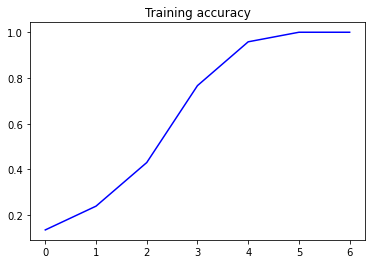

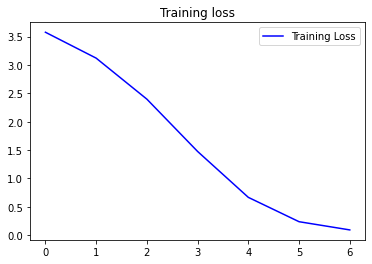

In [ ]:
# Take a look at the training curves of your model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

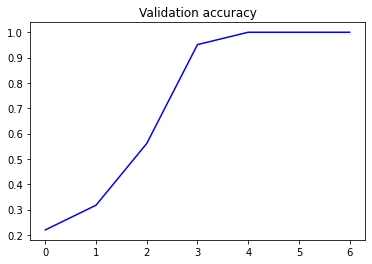

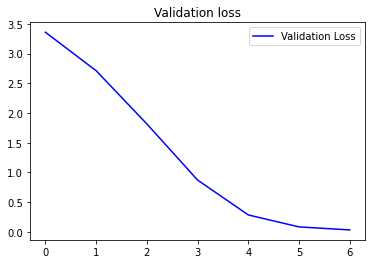

In [ ]:
# Take a look at the Validation curves of your model

acc = history.history['val_accuracy']
loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Validation accuracy')
plt.title('Validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Validation Loss')
plt.title('Validation loss')
plt.legend()

plt.show()

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('my_model.h5', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('my_model.h5')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(history, open(filename, 'wb'))

NameError: ignored

In [42]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Flower Classification
         """
         )


Writing app.py


In [43]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 37.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=9143f0244db7888fe39f68b708fba1d4d67338d9c16327470200092770d5729c
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [44]:
!ngrok authtoken 2GBxCvhdF8iE8swTgqJlhkN2Wc9_VKDQsYRzEWxYm8D5mcYD

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [45]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'
nohup: failed to run command 'streamlit': No such file or directory


In [46]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

<NgrokTunnel: "http://db7a-34-86-174-183.ngrok.io" -> "http://localhost:80">

In [47]:
!cat /content/nohup.out